In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import sys
import os 

sys.path.append('..')
from src import config

if sys.platform == 'linux':
    path = config.LINUX_PATH
else:
    path = config.OS_PATH
os.chdir(path)

In [2]:
data_path = config.STRAVA_TRAIN_PATH
data = pd.read_csv(data_path, index_col=0)
print(data.columns)
data.head()

Index(['name', 'distance', 'moving_time', 'total_elevation_gain',
       'workout_type', 'timezone', 'achievement_count', 'kudos_count',
       'athlete_count', 'photo_count', 'manual', 'max_speed',
       'average_heartrate', 'max_heartrate', 'pr_count', 'total_photo_count',
       'suffer_score', 'date', 'time', 'run_area', 'latlng_cluster', 'city',
       'average_speed_mpk'],
      dtype='object')


,name,distance,moving_time,total_elevation_gain,workout_type,timezone,achievement_count,kudos_count,athlete_count,photo_count,...,max_heartrate,pr_count,total_photo_count,suffer_score,date,time,run_area,latlng_cluster,city,average_speed_mpk
260,Pre meet,7.1960,28.383333,3.0,3.0,America/Boise,0.0,33.0,1.0,0.0,...,173.0,0.0,0.0,16.0,2021-01-29,21:51:05,2.207397,1,Boise,3.944615
261,WU,4.8448,22.183333,44.0,0.0,America/Boise,0.0,11.0,1.0,0.0,...,167.0,0.0,0.0,20.0,2021-01-29,21:08:46,0.166980,1,Boise,4.578571
262,Gain train 🚂😈🤪,8.1354,36.100000,10.0,0.0,America/Boise,0.0,32.0,1.0,0.0,...,164.0,0.0,0.0,26.0,2021-01-29,16:01:32,5.870196,1,Boise,4.437167
263,"Not 10, sorry Logan",12.9277,59.283333,49.0,0.0,America/Boise,2.0,44.0,1.0,0.0,...,165.0,0.0,0.0,52.0,2021-01-28,22:39:54,37.574116,1,Boise,4.586131
264,😴,6.7834,30.283333,9.0,0.0,America/Boise,0.0,27.0,1.0,0.0,...,165.0,0.0,0.0,29.0,2021-01-28,14:13:57,4.207750,1,Boise,4.464506


In [7]:
from pycaret.regression import *

data_path = config.STRAVA_TRAIN_PATH
data = pd.read_csv(data_path, index_col=0)
data = data.drop(['name'], axis=1)
reg = setup(data, target='kudos_count')
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,7.1647,111.0491,10.4461,0.8067,0.5191,0.3089,0.0700
gbr,Gradient Boosting Regressor,7.2127,113.6100,10.5305,0.8012,0.5185,0.3128,0.0240
catboost,CatBoost Regressor,7.1886,115.2945,10.6598,0.7992,0.5166,0.3348,2.4670
omp,Orthogonal Matching Pursuit,8.2339,129.5231,11.3078,0.7727,0.5800,0.4196,0.0030
ridge,Ridge Regression,8.3949,133.9801,11.4803,0.7636,0.5844,0.4232,0.0030
rf,Random Forest Regressor,7.4851,135.8677,11.4975,0.7602,0.5360,0.3364,0.0780
br,Bayesian Ridge,8.5215,138.4311,11.6656,0.7573,0.5883,0.4292,0.0050
lr,Linear Regression,8.5534,137.7454,11.6484,0.7562,0.5912,0.4232,0.0040
xgboost,Extreme Gradient Boosting,7.9674,142.8776,11.8231,0.7497,0.5345,0.3545,36.8100
ada,AdaBoost Regressor,9.9855,157.3469,12.4458,0.7257,0.6284,0.5512,0.0220


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=6505, verbose=0, warm_start=False)

In [11]:
model = create_model('xgboost')
tuned_model = tune_model(model)
model_final = finalize_model(tuned_model)
# save_model(model_final, 'models/kudos_second')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,8.1538,147.9633,12.1640,0.7902,0.5843,0.1945
1,7.9955,167.1854,12.9300,0.6361,0.6305,0.2294
2,6.0558,66.4584,8.1522,0.8711,0.3970,0.4840
3,7.8201,112.0578,10.5857,0.8394,0.3647,0.3393
4,8.4733,142.0408,11.9181,0.7977,0.5998,1.0503
5,7.3417,106.0744,10.2992,0.7923,0.5356,0.2005
6,9.2141,219.2393,14.8067,0.6462,0.3817,0.2728
7,8.7760,167.9833,12.9608,0.6188,0.7805,0.2385
8,8.9060,172.7708,13.1442,0.6609,0.6578,0.3230
9,6.9376,127.0021,11.2695,0.8444,0.4132,0.2121


IntProgress(value=0, description='Processing: ', max=7)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:03:20
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Extreme Gradient Boosting


,MAE,MSE,RMSE,R2,RMSLE,MAPE


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed: 40.2min


KeyboardInterrupt: 

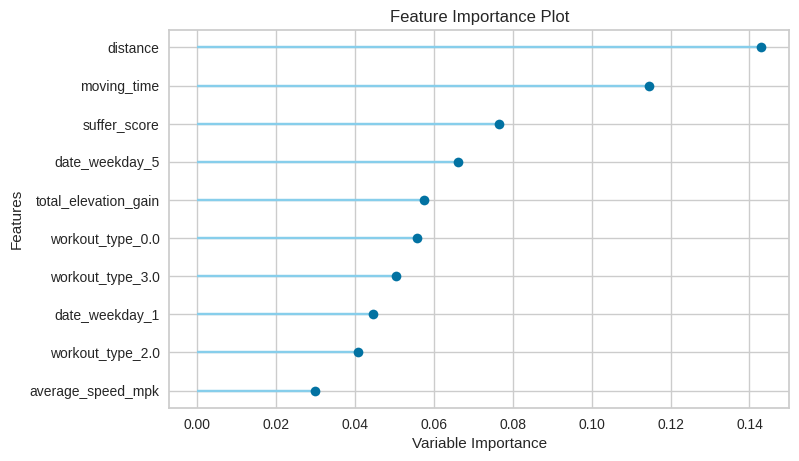

In [9]:
plot_model(tuned_model)
interpret_model(tuned_model)
plot_model(tuned_model, plot='feature')

In [10]:
data_path = config.STRAVA_TEST_PATH
data_unseen = pd.read_csv(data_path, index_col=0)
predictions = predict_model(tuned_model, data=data_unseen)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(predictions.kudos_count.values, predictions.Label.values)
rmse = mean_squared_error(predictions.kudos_count.values, predictions.Label.values, squared=False)
print(f'MSE: {mse:.2f}\nRMSE: {rmse:.2f}')

MSE: 270.90
RMSE: 16.46
